In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/lucy/Downloads/inner.csv')

In [3]:
df

,Unnamed: 0,전통주명,가격,용량,주종,도수,단맛,신맛,바디감,향,청량감,균형감,목넘김,맛,잘 어울리는 음식,주원료,제조사,이미지
0,0,감그린 레귤러,"18,000",750ml,과실주,12.0,3.0,3.0,2.0,NaN,3.0,NaN,NaN,NaN,소고기류,감(국내산),NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
1,1,감그린 스페셜,"25,000",750ml,과실주,12.0,3.0,3.0,3.0,NaN,3.0,NaN,NaN,NaN,소고기류,감(국내산),청도감와인,https://dthumb-phinf.pstatic.net/?src=%22https...
2,2,감그린 아이스와인,"89,000",375ml,과실주,10.0,4.0,2.0,4.0,NaN,2.0,NaN,NaN,NaN,"모짜렐라 치즈, 카망베르, 스모키 치즈",감(국내산),청도감와인,https://dthumb-phinf.pstatic.net/?src=%22https...
3,3,감악산 머루주,"28,000",360ml,과실주,12.0,4.0,4.0,3.0,NaN,3.0,NaN,NaN,NaN,"메기, 참게, 흑염소, 오리로스구이","국내산 산머루원액 78.5%, 주정",NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
4,4,고도리 레드와인 스위트,"22,000",750ml,과실주,12.0,3.0,3.0,3.0,NaN,2.0,NaN,NaN,NaN,"육회, 수육, 불고기",MBA 머루포도(경북 영천),NaN,https://dthumb-phinf.pstatic.net/?src=%22https...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,334,해창 생막걸리 6도,"3,000",900ml,탁주,6.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN,NaN,간재미 찜,"햅쌀, 찹쌀, 물, 누룩",해창주조장,https://dthumb-phinf.pstatic.net/?src=%22https...
335,335,해창 생막걸리 9도,"6,000",900ml,탁주,9.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,NaN,전복구이,"햅쌀, 찹쌀, 물, 누룩",해창주조장,https://dthumb-phinf.pstatic.net/?src=%22https...
336,336,호담 산양산삼 막걸리,"16,000",750ml,탁주,6.0,1.0,3.0,1.0,NaN,3.0,NaN,NaN,NaN,김치전,"쌀(경기미), 입국, 산양산삼, 정제수, 아스파탐",대농바이오우리산삼,https://dthumb-phinf.pstatic.net/?src=%22https...
337,337,호랑이 생 막걸리,"2,200",750ml,탁주,6.0,4.0,1.0,4.0,NaN,2.0,NaN,NaN,NaN,중국음식,"물, 쌀(국내산),에리스리톨, 효모, 국, 젖산, 합성향료,밀함유",배혜정도가,https://dthumb-phinf.pstatic.net/?src=%22https...


In [6]:
# iris 데이터(붓꽃) 예시

In [5]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [58]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
# 단신바청을 배열로만

In [38]:
단신바청=df[['단맛','신맛','바디감','청량감']]

In [28]:
단신바청.iloc[1]

단맛     3.0
신맛     3.0
바디감    3.0
청량감    3.0
Name: 1, dtype: float64

In [31]:
# 배열로 변환 (붓꽃 데이터와 같은 형태가 됨)

In [33]:
단신바청=단신바청.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [36]:
단신바청_values=단신바청

In [37]:
단신바청_values

array([[3., 3., 2., 3.],
       [3., 3., 3., 3.],
       [4., 2., 4., 2.],
       ...,
       [1., 3., 1., 3.],
       [4., 1., 4., 2.],
       [2., 3., 2., 2.]])

In [39]:
단신바청

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [70]:
# kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
# kmeans.fit(단신바청)

In [41]:
# 결측치 제거

In [42]:
#Nan값을 0으로 바꾸기

In [50]:
단신바청_zero=단신바청.fillna(0)

In [51]:
단신바청_zero

,단맛,신맛,바디감,청량감
0,3.0,3.0,2.0,3.0
1,3.0,3.0,3.0,3.0
2,4.0,2.0,4.0,2.0
3,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,2.0
...,...,...,...,...
334,1.0,1.0,2.0,3.0
335,1.0,1.0,2.0,2.0
336,1.0,3.0,1.0,3.0
337,4.0,1.0,4.0,2.0


In [43]:
# nan인 행을 지우면 얼마나 남는지

In [59]:
#단신바청.dropna(how='all',axis=0) --> 안됨

In [55]:
# 0으로 채운 후. 군집화 수행 가능해짐 (4개로 지정)

In [53]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(단신바청_zero)

KMeans(n_clusters=4, random_state=0)

In [57]:
# 차원 축소 (속성 4개 -> 2개)

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(단신바청_zero.values)

단신바청_zero['pca_x'] = pca_transformed[:,0]
단신바청_zero['pca_y'] = pca_transformed[:,1]
단신바청_zero.head(3)

,단맛,신맛,바디감,청량감,pca_x,pca_y
0,3.0,3.0,2.0,3.0,2.146065,-0.357506
1,3.0,3.0,3.0,3.0,2.112166,-0.003119
2,4.0,2.0,4.0,2.0,1.461380,1.803906


In [61]:
단신바청_zero

,단맛,신맛,바디감,청량감,pca_x,pca_y
0,3.0,3.0,2.0,3.0,2.146065,-0.357506
1,3.0,3.0,3.0,3.0,2.112166,-0.003119
2,4.0,2.0,4.0,2.0,1.461380,1.803906
3,4.0,4.0,3.0,3.0,3.278823,0.249860
4,3.0,3.0,3.0,2.0,1.549273,0.176654
...,...,...,...,...,...,...
334,1.0,1.0,2.0,3.0,-0.187249,-0.863464
335,1.0,1.0,2.0,2.0,-0.750143,-0.683691
336,1.0,3.0,1.0,3.0,1.067301,-2.237737
337,4.0,1.0,4.0,2.0,0.851054,2.313848


In [65]:
단신바청_zero['cluster']=kmeans.labels_

In [66]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 0, 1, 0, 2, 2,
       0, 3, 1, 1, 3, 2, 2, 1, 2, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 1, 3, 3,
       3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0,
       2, 1, 1, 2, 2, 0, 0, 1, 1, 3, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 2, 3, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1,
       1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2,

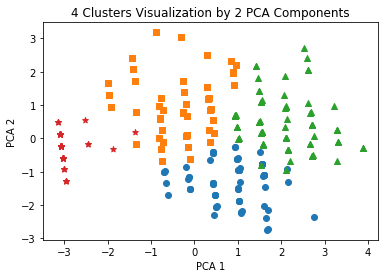

In [69]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = 단신바청_zero[단신바청_zero['cluster']==0].index
marker1_ind = 단신바청_zero[단신바청_zero['cluster']==1].index
marker2_ind = 단신바청_zero[단신바청_zero['cluster']==2].index
marker3_ind = 단신바청_zero[단신바청_zero['cluster']==3].index



# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=단신바청_zero.loc[marker0_ind,'pca_x'], y=단신바청_zero.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=단신바청_zero.loc[marker1_ind,'pca_x'], y=단신바청_zero.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=단신바청_zero.loc[marker2_ind,'pca_x'], y=단신바청_zero.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=단신바청_zero.loc[marker3_ind,'pca_x'], y=단신바청_zero.loc[marker3_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()